## To read the json file and it's context:

In [1]:
import json

with open("output3.json", "r", encoding='utf-8') as file:
    data = json.load(file)
file.close()

In [2]:
data_copy = data.copy

In [3]:
for item in data:
    if "tags" in item.keys():
        item["tags"] = [tag.strip("12345()").replace("\u200c", " ") for tag in item["tags"]]

In [4]:
all_tags = list()

for item in data:
    if "tags" in item.keys():
        [all_tags.append(tag) for tag in item["tags"]]

In [5]:
all_titles = list()

for item in data:
        all_titles.append(item["title"])

len(all_titles)

266

In [6]:
all_tags = [element.strip("12345()") for element in all_tags]
len(all_tags)

1641

In [7]:
unique_tags = list(set(all_tags))
len(unique_tags)

340

In [8]:
unique_tags

['داده انبوه',
 'ازکارافتادگی سرویس',
 'ت مشتری',
 'رایانش مشبک',
 'مشتری پسندسازی',
 'سرمایه گذاری خطرپذیر',
 'مدیریت شکایات',
 'شبکه عصبی مصنوعی',
 'ویژگی محصول',
 'مدل غیرخطی',
 'ارزش عمر مشتری',
 'تحلیل فرآیند',
 'زمان',
 'تجارت الکترونیکی',
 'خرده فروشی',
 'بازاریابی ارتباطی',
 'تصور از ریسک خرید',
 'client satisfaction',
 'فاکتور "مزیت نسبی و اثر آن بر استفاده کنندگان دانشگاهی" در مدل "تمایل به بکارگیری"',
 'توانگری مالی',
 'متاستاز',
 'رقابت',
 'internet',
 'نوآوری باز',
 'صنعت نفت',
 'رویگردانی',
 'هزینه تصادفات',
 'ماتریس سیاست گذاری هدایتی',
 'فناوری اطلاعات',
 'کارآیی بنگاه',
 'ارزیابی عملکرد',
 'شرکت فولاد خوزستان',
 'ایران',
 'مدیریت صنعتی',
 'Information technology',
 'مدل فرآیندی',
 'بانک ملی ایران',
 'زنجیره تامین',
 'الزامات',
 'اجتماع یابی',
 'قابلیت',
 'فراگیر',
 'فرایندکاوی',
 'سکته مغزی',
 'knowledge management',
 'فضای مجازی',
 'داده های موقعیت مکانی',
 'قابلیت اطمینان',
 'سازمان امور مالیاتی کشور',
 'مشارکت',
 'شناسایی موانع',
 'معادله کوراموتو-سیواشینسکی',
 'سیس

In [9]:
# unique_tags = [i.replace("\u200c", " ") for i in unique_tags]

In [10]:
# unique_tags

In [11]:
# all_tags = [i.replace("\u200c", " ") for i in all_tags]

In [12]:
len(all_tags)

1641

In [13]:
import numpy as np
adjacency_matrix = np.zeros((len(unique_tags), len(unique_tags)))

In [14]:
tags_indices = {word:index for index, word in enumerate(unique_tags)}

## To create Adjacency Matrix:

In [15]:
for item in data:
    if "tags" in item.keys():
        for i in range(len(item["tags"])):
            for j in range(i+1, len(item["tags"])):
                tag1 = item["tags"][i]
                tag2 = item["tags"][j]
                index1 = tags_indices[tag1]
                index2 = tags_indices[tag2]
                adjacency_matrix[index1][index2] = 1
                adjacency_matrix[index2][index1] = 1

In [16]:
for item in data:
    for tag in item["tags"]:
        print(unique_tags.index(tag))

78
130
29
23
38
173
40
89
101
299
54
83
274
252
308
46
47
7
41
245
314
297
288
54
3
331
3
331
184
135
54
323
271
288
10
170
107
149
123
207
219
256
332
339
233
170
152
205
75
216
193
17
213
150
227
201
288
246
98
28
34
128
61
157
60
198
168
166
22
210
145
290
66
13
320
114
28
34
128
61
157
60
198
168
166
22
210
145
290
66
13
320
114
28
34
128
61
157
60
198
168
166
22
210
145
290
66
13
320
114
97
209
200
121
232
97
209
200
121
232
97
209
200
121
232
97
209
200
121
232
97
209
200
121
232
177
328
32
166
181
293
9
162
265
293
9
162
265
13


KeyError: 'tags'

In [17]:
file_path = 'adjacency_matrix.txt'
np.savetxt(file_path, adjacency_matrix, fmt='%d')

## To export the graph:

In [18]:
import arabic_reshaper
reshaped_unique_tags = [arabic_reshaper.reshape(tag) for tag in unique_tags]

In [19]:
encoded_unique_tags = [tag.encode('utf-8') for tag in unique_tags]

In [20]:
reshaped_unique_tags

['ﺩﺍﺩﻩ ﺍﻧﺒﻮﻩ',
 'ﺍﺯﮐﺎﺭﺍﻓﺘﺎﺩﮔﯽ ﺳﺮﻭﯾﺲ',
 'ﺕ ﻣﺸﺘﺮﯼ',
 'ﺭﺍﯾﺎﻧﺶ ﻣﺸﺒﮏ',
 'ﻣﺸﺘﺮﯼ ﭘﺴﻨﺪﺳﺎﺯﯼ',
 'ﺳﺮﻣﺎﯾﻪ ﮔﺬﺍﺭﯼ ﺧﻄﺮﭘﺬﯾﺮ',
 'ﻣﺪﯾﺮﯾﺖ ﺷﮑﺎﯾﺎﺕ',
 'ﺷﺒﮑﻪ ﻋﺼﺒﯽ ﻣﺼﻨﻮﻋﯽ',
 'ﻭﯾﮋﮔﯽ ﻣﺤﺼﻮﻝ',
 'ﻣﺪﻝ ﻏﯿﺮﺧﻄﯽ',
 'ﺍﺭﺯﺵ ﻋﻤﺮ ﻣﺸﺘﺮﯼ',
 'ﺗﺤﻠﯿﻞ ﻓﺮﺁﯾﻨﺪ',
 'ﺯﻣﺎﻥ',
 'ﺗﺠﺎﺭﺕ ﺍﻟﮑﺘﺮﻭﻧﯿﮑﯽ',
 'ﺧﺮﺩﻩ ﻓﺮﻭﺷﯽ',
 'ﺑﺎﺯﺍﺭﯾﺎﺑﯽ ﺍﺭﺗﺒﺎﻃﯽ',
 'ﺗﺼﻮﺭ ﺍﺯ ﺭﯾﺴﮏ ﺧﺮﯾﺪ',
 'client satisfaction',
 'ﻓﺎﮐﺘﻮﺭ "ﻣﺰﯾﺖ ﻧﺴﺒﯽ ﻭ ﺍﺛﺮ ﺁﻥ ﺑﺮ ﺍﺳﺘﻔﺎﺩﻩ ﮐﻨﻨﺪﮔﺎﻥ ﺩﺍﻧﺸﮕﺎﻫﯽ" ﺩﺭ ﻣﺪﻝ "ﺗﻤﺎﯾﻞ ﺑﻪ ﺑﮑﺎﺭﮔﯿﺮﯼ"',
 'ﺗﻮﺍﻧﮕﺮﯼ ﻣﺎﻟﯽ',
 'ﻣﺘﺎﺳﺘﺎﺯ',
 'ﺭﻗﺎﺑﺖ',
 'internet',
 'ﻧﻮﺁﻭﺭﯼ ﺑﺎﺯ',
 'ﺻﻨﻌﺖ ﻧﻔﺖ',
 'ﺭﻭﯾﮕﺮﺩﺍﻧﯽ',
 'ﻫﺰﯾﻨﻪ ﺗﺼﺎﺩﻓﺎﺕ',
 'ﻣﺎﺗﺮﯾﺲ ﺳﯿﺎﺳﺖ ﮔﺬﺍﺭﯼ ﻫﺪﺍﯾﺘﯽ',
 'ﻓﻨﺎﻭﺭﯼ ﺍﻃﻼﻋﺎﺕ',
 'ﮐﺎﺭﺁﯾﯽ ﺑﻨﮕﺎﻩ',
 'ﺍﺭﺯﯾﺎﺑﯽ ﻋﻤﻠﮑﺮﺩ',
 'ﺷﺮﮐﺖ ﻓﻮﻻﺩ ﺧﻮﺯﺳﺘﺎﻥ',
 'ﺍﯾﺮﺍﻥ',
 'ﻣﺪﯾﺮﯾﺖ ﺻﻨﻌﺘﯽ',
 'Information technology',
 'ﻣﺪﻝ ﻓﺮﺁﯾﻨﺪﯼ',
 'ﺑﺎﻧﮏ ﻣﻠﯽ ﺍﯾﺮﺍﻥ',
 'ﺯﻧﺠﯿﺮﻩ ﺗﺎﻣﯿﻦ',
 'ﺍﻟﺰﺍﻣﺎﺕ',
 'ﺍﺟﺘﻤﺎﻉ ﯾﺎﺑﯽ',
 'ﻗﺎﺑﻠﯿﺖ',
 'ﻓﺮﺍﮔﯿﺮ',
 'ﻓﺮﺍﯾﻨﺪﮐﺎﻭﯼ',
 'ﺳﮑﺘﻪ ﻣﻐﺰﯼ',
 'knowledge management',
 'ﻓﻀﺎﯼ ﻣﺠﺎﺯﯼ',
 'ﺩﺍﺩﻩ ﻫﺎﯼ ﻣﻮﻗﻌﯿﺖ ﻣﮑﺎﻧﯽ',
 'ﻗﺎﺑﻠﯿﺖ ﺍﻃﻤﯿﻨﺎﻥ',
 'ﺳﺎﺯﻣﺎﻥ ﺍﻣﻮﺭ ﻣﺎﻟﯿﺎﺗﯽ ﮐﺸﻮﺭ',
 'ﻣﺸﺎﺭﮐﺖ',
 'ﺷﻨﺎﺳﺎﯾﯽ ﻣﻮﺍﻧﻊ',
 'ﻣﻌﺎﺩﻟﻪ ﮐﻮﺭﺍﻣﻮﺗﻮ-ﺳﯿﻮﺍﺷﯿﻨﺴﮑﯽ',
 'ﺳﯿﺴﺘﻢ

In [21]:
from igraph import Graph
from igraph import plot

graph = Graph.Read_Adjacency("adjacency_matrix.txt")
graph.vs["name"] = reshaped_unique_tags
graph.vs["label"] = reshaped_unique_tags

In [22]:
degree_centrality = graph.degree()
pagerank_centrality = graph.pagerank()

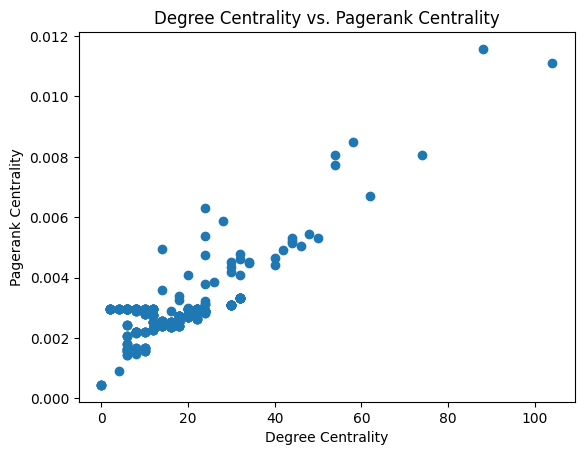

In [23]:
import matplotlib.pyplot as plt
plt.scatter(degree_centrality, pagerank_centrality)
plt.title("Degree Centrality vs. Pagerank Centrality")
plt.xlabel("Degree Centrality")
plt.ylabel("Pagerank Centrality")
plt.show()

In [24]:
import arabic_reshaper

min_size = 10
max_size = 100
node_sizes = [(degree - min(degree_centrality)) / (max(degree_centrality) - min(degree_centrality)) 
              * (max_size - min_size) + min_size for degree in degree_centrality]

layout = graph.layout("kk")  # Choose a layout algorithm (e.g., "circle", "fr", "kk", etc.)
# visual_style = {}
# visual_style['vertex.label.family'] = 'Arial'
# visual_style['vertex.label.cex'] = 1.2
plot(graph, layout=layout, vertex_size=node_sizes, vertex_color="lightblue", edge_color="gray",
        vertex_frame_color="black", edge_width=1.0, bbox=(800, 300), margin=20)